<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


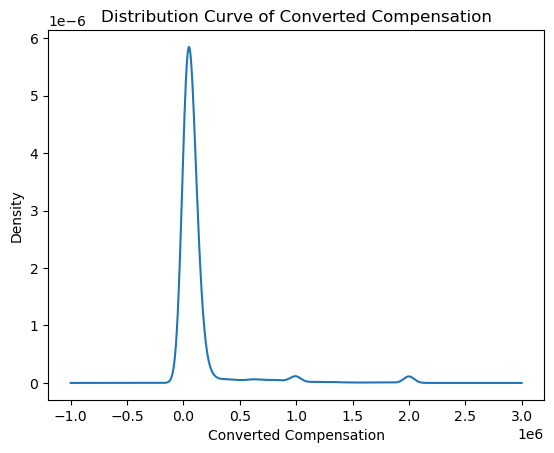

In [4]:
# your code goes here
import matplotlib.pyplot as plt

# Plotting the distribution curve
df['ConvertedComp'].plot.kde()
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.title('Distribution Curve of Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


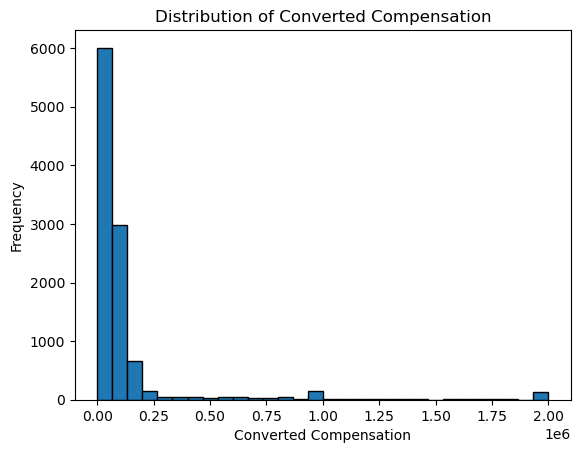

In [5]:
# your code goes here
import matplotlib.pyplot as plt

# Plotting the distribution curve
plt.hist(df['ConvertedComp'], bins=30, edgecolor='k')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_value_ConvertedComp = df['ConvertedComp'].median()
print(median_value_ConvertedComp)

57745.0


How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
count_gender_man = df['Gender'].str.lower().value_counts()['man']
print(count_gender_man)


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
median_comp_woman = df.loc[df['Gender'].str.lower() == 'woman', 'ConvertedComp'].median()
print(median_comp_woman)
# In this code, df['Gender'].str.lower() == 'woman' creates a boolean mask to filter the DataFrame 
# where the 'Gender' column value is 'woman' (ignoring the case). 
# Then, df.loc[boolean_mask, 'ConvertedComp'] selects the 'ConvertedComp' column for the filtered rows, and .median()

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
summary_Age = df['Age'].describe()

minimum_Age = summary_Age['min']
first_quartile_Age = summary_Age['25%']
median_Age = summary_Age['50%']
third_quartile_Age = summary_Age['75%']
maximum_Age = summary_Age['max']

print("Minimum: ", minimum_Age)
print("1st Quartile: ", first_quartile_Age)
print("Median: ", median_Age)
print("3rd Quartile: ", third_quartile_Age)
print("Maximum: ", maximum_Age)


Minimum:  16.0
1st Quartile:  25.0
Median:  29.0
3rd Quartile:  35.0
Maximum:  99.0


Plot a histogram of the column `Age`.


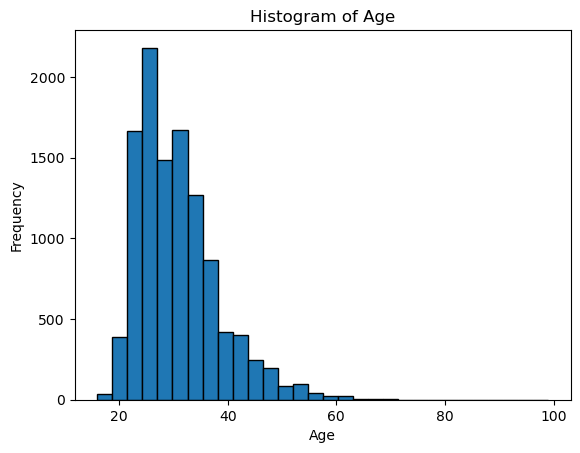

In [16]:
# your code goes here
plt.hist(df['Age'], bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


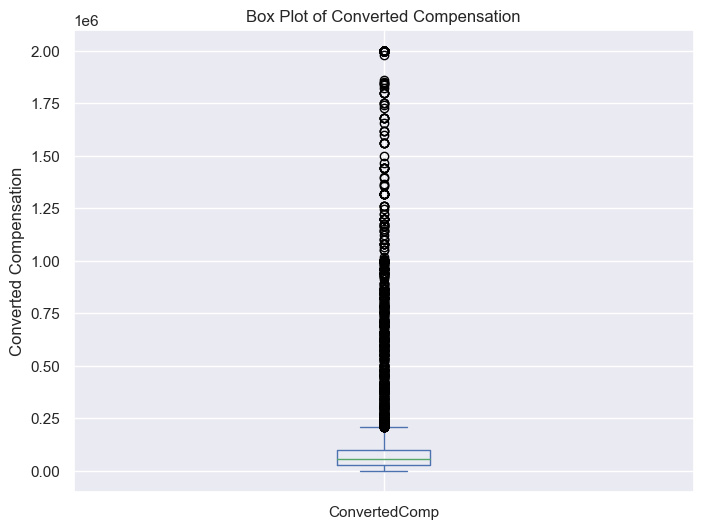

In [36]:
# your code goes here
import matplotlib as mpl
import seaborn as sns

sns.set(style='darkgrid')

df['ConvertedComp'].plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Converted Compensation')
plt.ylabel('Converted Compensation')

plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [37]:
# your code goes here
summary_ConvertedComp = df['ConvertedComp'].describe()

first_quartile_ConvertedComp = summary_ConvertedComp['25%']
third_quartile_ConvertedComp = summary_ConvertedComp['75%']

# Calculate the Interquartile Range (IQR)
iqr_ConvertedComp = third_quartile_ConvertedComp - first_quartile_ConvertedComp

print("Q1:", first_quartile_ConvertedComp)
print("Q3:", third_quartile_ConvertedComp)
print("IQR:", iqr_ConvertedComp)

Q1: 26868.0
Q3: 100000.0
IQR: 73132.0


Find out the upper and lower bounds.


In [40]:
# your code goes here
# not sure what they mean...

# Calculate the upper and lower bounds
upper_bound = third_quartile_ConvertedComp + 1.5 * iqr_ConvertedComp
lower_bound = first_quartile_ConvertedComp - 1.5 * iqr_ConvertedComp

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

# maybe just min and max...
minimum_ConvertedComp = summary_ConvertedComp['min']
maximum_ConvertedComp = summary_ConvertedComp['max']

print("Minimum:", minimum_ConvertedComp)
print("Maximum:", maximum_ConvertedComp)

Upper Bound: 209698.0
Lower Bound: -82830.0
Minimum: 0.0
Maximum: 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [55]:
# your code goes here
# To identify the number of outliers in the 'ConvertedComp' column, 
# you can use the interquartile range (IQR) method. 
# The outliers can be determined by considering values that fall below the lower bound (Q1 - 1.5 * IQR) 
# or above the upper bound (Q3 + 1.5 * IQR).
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)

#The expression (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound) 
# creates a boolean mask indicating rows where the 'ConvertedComp' values are either less than the lower bound or 
# greater than the upper bound. True values in the boolean mask indicate outliers.

print("Number of outliers:", num_outliers)

Number of outliers: 879


In [56]:
# with sum as found in discussion forums
num_sum_outliers = sum((df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound))
print("Number of outliers:", num_sum_outliers)

Number of outliers: 879


In [57]:
median_ConvertedComp = summary_ConvertedComp['50%']

print("Median:", median_ConvertedComp)

Median: 57745.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [58]:
df_no_outliers = df.drop(outliers.index)
#The index attribute of the outliers DataFrame gives the row indices of the outliers

In [59]:
df_no_outliers['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [46]:
# your code goes here
correlation = df.corr(numeric_only=True)['Age']

# Display correlation values
print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Histogram for age-groups

Nowhere above was it specified they wanted age groups... and in test it comes...

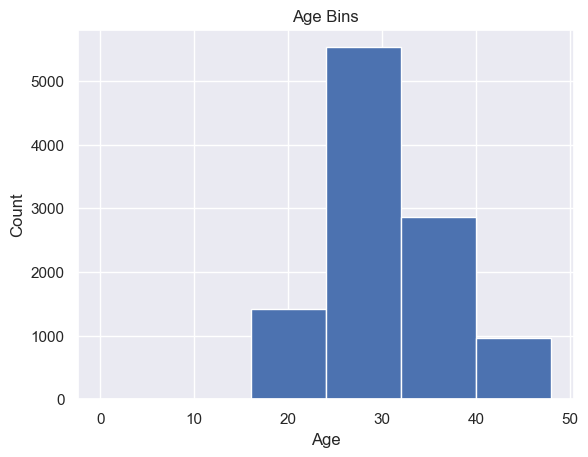

In [53]:
# Define the bins for age groups
age_bins = [0, 16, 24, 32, 40, 48]

# Plot the histogram
plt.hist(df['Age'], bins=age_bins)

# Set the x/y labels and plot title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Bins')

# Display the histogram
plt.show()



Far from perfect but got the answer I was looking for, so...

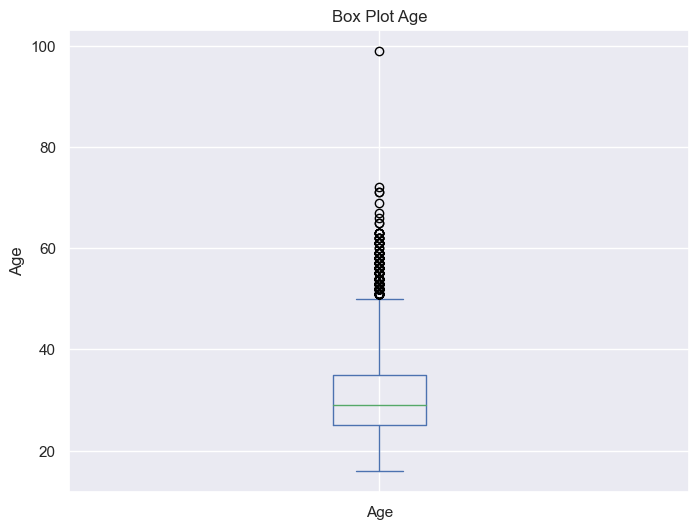

In [60]:
# Also turns out that for the test bit even a boxplot for age is needed 
df['Age'].plot(kind='box', figsize=(8, 6))

plt.title('Box Plot Age')
plt.ylabel('Age')

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
